In [1]:
from antifungal.analyze import antifungal_contribution
from time import time

seq = 'HIHIRHMWLLRRR'
afc = antifungal_contribution(seq)
contributions, r2 = afc.get_amino_acid_contribution(n_sampling=100, seed = 42)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Data/Python/antifungal/antifungal/analyze.py:23: UserWarning: Number of samples is set to 10 times the sequence length.
  warnings.warn('Number of samples is set to 10 times the sequence length.')


<AxesSubplot:title={'center':'Antifungal Contribution tests, R2 = 0.13'}, xlabel='Amino acid', ylabel='Antifungal Contribution'>

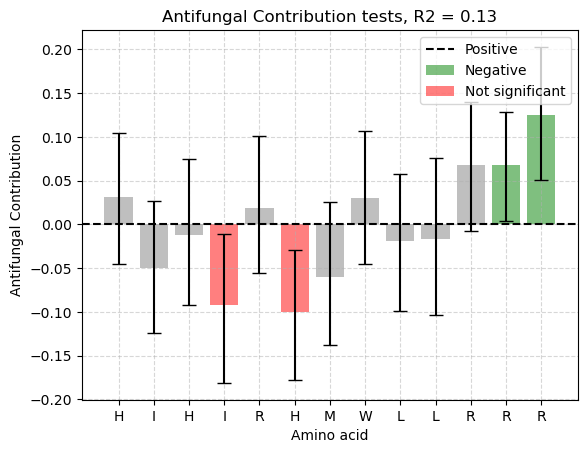

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Plot contributions
fig, ax = plt.subplots()

afc.plot_contributions(ax = ax)


In [3]:
# Find positions with the smallest contributions, and perform multi-point mutation analysis
from antifungal.design import multi_point_mutate
smallest_contributions_indices = np.argsort(contributions)[:3]


multi_mutate_instance = multi_point_mutate(seq)
multi_mutate_instance.get_candidate_sequences(positions=smallest_contributions_indices + 1)
multi_mutate_predictions = multi_mutate_instance.predict()
print(multi_mutate_predictions)